<a href="https://colab.research.google.com/github/hayhalo/Project-Akhir-Belajar-ML-untuk-Pemula/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Muhammad%20Husni%20Zahran%20Nugrahanto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Library Dasar dan Visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing dan Pembagian Data
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Model Klasifikasi
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluasi Model
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/hayhalo/Project-Akhir-Belajar-ML-untuk-Pemula/refs/heads/main/Dataset_inisiasi.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeTransactionDifference,TransactionRate,AverageTransaction,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,572.652014,0.002756,0.024605,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,495.642546,0.027345,0.759095,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,482.577037,0.112523,0.261699,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,548.650637,0.021531,0.336280,1
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,384.593924,0.001810,0.034972,1


In [27]:
scaler = RobustScaler()
scaled_cols = df.drop('Cluster', axis=1).select_dtypes(include=['number']).columns
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeTransactionDifference,TransactionRate,AverageTransaction,Cluster
0,TX000001,AC00128,-0.592378,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.78125,Doctor,-0.321429,0.0,0.061009,2024-11-04 08:08:08,0.467785,-0.368297,-0.573199,0
1,TX000002,AC00455,0.496329,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.71875,Doctor,0.290816,0.0,1.461410,2024-11-04 08:09:35,0.053975,-0.184103,0.443562,0
2,TX000003,AC00019,-0.255079,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-0.81250,Student,-0.576531,0.0,-0.585179,2024-11-04 08:07:04,-0.016233,0.453954,-0.244988,1
3,TX000004,AC00070,-0.080086,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-0.59375,Student,-0.892857,0.0,0.620873,2024-11-04 08:09:06,0.338814,-0.227657,-0.141746,1
4,TX000005,AC00411,-0.594302,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,-0.59375,Student,0.872449,0.0,0.436296,2024-11-04 08:06:39,-0.542745,-0.375382,-0.558848,1


In [39]:
# Count Encodinga Data
count_encd = ['AccountID', 'Location','DeviceID', 'MerchantID', 'CustomerOccupation']

# Count encoding sederhana + simpan mapping
count_maps = {}
for col in count_encd:
    mapping = df[col].value_counts()
    df[col] = df[col].map(mapping)
    count_maps[col] = mapping

In [40]:
# Label Encoding untuk Transaction_Type
df['TransactionType'] = df['TransactionType'].map({'Credit': 1, 'Debit': 0})

# Label Encoding untuk Transaction_Channel
df['Channel'] = df['Channel'].map({'ATM': 0, 'Branch': 1, 'Online': 2})

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [41]:
numerical_cols = df.select_dtypes(include=['number']).columns
df_clas = df[numerical_cols].copy()
X_train, X_test, y_train, y_test = train_test_split(df_clas.drop('Cluster', axis=1), df_clas['Cluster'], test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1758, 15) (754, 15) (1758,) (754,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [42]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Dictionary to store F1 scores
f1_scores = {}

# Train each model and compute F1 score
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores[model_name] = f1

# Display the F1 scores for comparison
f1_scores_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])
f1_scores_df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,F1 Score
0,Logistic Regression,0.679649
1,Decision Tree,1.000000
2,Random Forest,1.000000
3,K-Nearest Neighbors,1.000000


In [43]:
# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

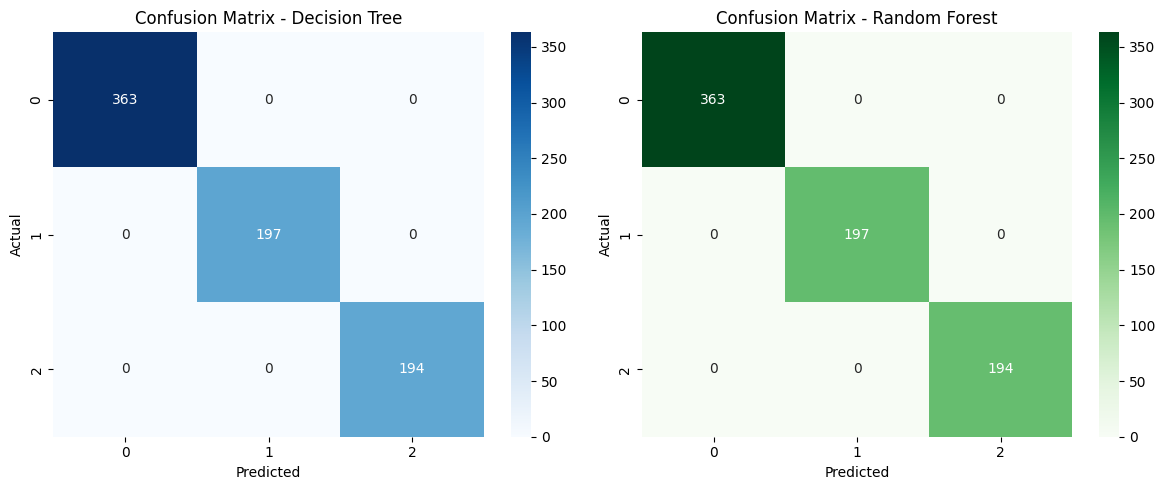

In [57]:
# Confusion Matrix Model
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Hitung confusion matrix untuk masing-masing model
cm_logreg = confusion_matrix(y_test, dt_pred)
cm_rf = confusion_matrix(y_test, rf_pred)

# Buat figure untuk 2 confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix untuk Decision Tree
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Decision Tree')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot confusion matrix untuk Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [58]:
# Classification Report Model
report_dt = classification_report(y_test, dt_pred, output_dict=True)
report_rf = classification_report(y_test, rf_pred, output_dict=True)

# Ubah jadi DataFrame
df_logreg = pd.DataFrame(report_dt).transpose()
df_rf = pd.DataFrame(report_rf).transpose()

# Gabungkan keduanya side-by-side
comparison_df = pd.concat([df_logreg.add_suffix('_DecisionTree'),
                           df_rf.add_suffix('_RandomForest')], axis=1)

# Tampilkan hanya label kelas dan average
display(comparison_df.round(3))

,precision_DecisionTree,recall_DecisionTree,f1-score_DecisionTree,support_DecisionTree,precision_RandomForest,recall_RandomForest,f1-score_RandomForest,support_RandomForest
0,1.0,1.0,1.0,363.0,1.0,1.0,1.0,363.0
1,1.0,1.0,1.0,197.0,1.0,1.0,1.0,197.0
2,1.0,1.0,1.0,194.0,1.0,1.0,1.0,194.0
accuracy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,754.0,1.0,1.0,1.0,754.0
weighted avg,1.0,1.0,1.0,754.0,1.0,1.0,1.0,754.0


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [48]:
# Parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, None],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['sqrt', 'log2', None]
}

# Grid search
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid,
                    cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Hasil tuning
print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Evaluasi di data test
y_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Test Accuracy:", acc)
print("Test F1 Score:", f1)

Best Params: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best CV Score: 1.0
Test Accuracy: 1.0
Test F1 Score: 1.0


In [50]:
# Parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10]
}

# Grid search
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
                    cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Hasil tuning
print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Evaluasi di data test
y_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Test Accuracy:", acc)
print("Test F1 Score:", f1)

Best Params: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best CV Score: 1.0
Test Accuracy: 1.0
Test F1 Score: 1.0


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [60]:
# Best parameters for Decision Tree
best_dt_model = DecisionTreeClassifier(
        criterion= 'gini',
         max_depth= 5,
         max_features= None,
         min_samples_leaf= 2,
         min_samples_split= 5
)

# Fit the model on the training data
best_dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred_tune = best_dt_model.predict(X_test)

In [61]:
# Best parameters for Random Forest
best_rf_model = RandomForestClassifier(
    max_depth= None,
     min_samples_leaf= 5,
     min_samples_split= 5,
     n_estimators= 50
)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred_tune = best_rf_model.predict(X_test)

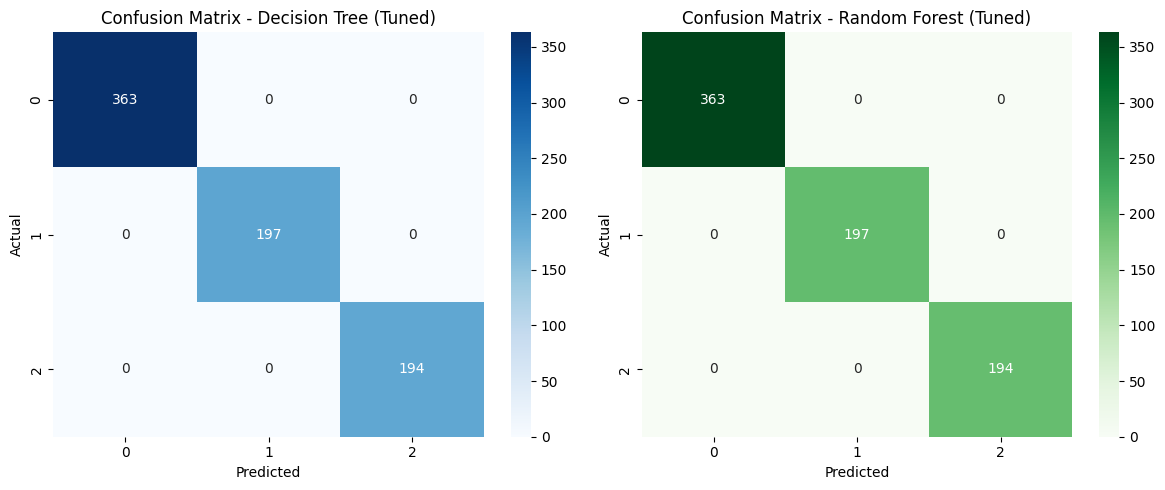

In [62]:
# Hitung confusion matrix untuk masing-masing model
cm_logreg = confusion_matrix(y_test, dt_pred_tune)
cm_rf = confusion_matrix(y_test, rf_pred_tune)

# Buat figure untuk 2 confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix untuk Decision Tree
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Decision Tree (Tuned)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot confusion matrix untuk Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest (Tuned)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [65]:
# Classification Report Model
report_dt = classification_report(y_test, dt_pred_tune, output_dict=True)
report_rf = classification_report(y_test, rf_pred_tune, output_dict=True)

# Ubah jadi DataFrame
df_dt = pd.DataFrame(report_dt).transpose()
df_rf = pd.DataFrame(report_rf).transpose()

# Gabungkan keduanya side-by-side
comparison_df = pd.concat([df_dt.add_suffix('_DecisionTree'),
                           df_rf.add_suffix('_RandomForest')], axis=1)

# Tampilkan hanya label kelas dan average
display(comparison_df.round(3))

,precision_DecisionTree,recall_DecisionTree,f1-score_DecisionTree,support_DecisionTree,precision_RandomForest,recall_RandomForest,f1-score_RandomForest,support_RandomForest
0,1.0,1.0,1.0,363.0,1.0,1.0,1.0,363.0
1,1.0,1.0,1.0,197.0,1.0,1.0,1.0,197.0
2,1.0,1.0,1.0,194.0,1.0,1.0,1.0,194.0
accuracy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,754.0,1.0,1.0,1.0,754.0
weighted avg,1.0,1.0,1.0,754.0,1.0,1.0,1.0,754.0


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

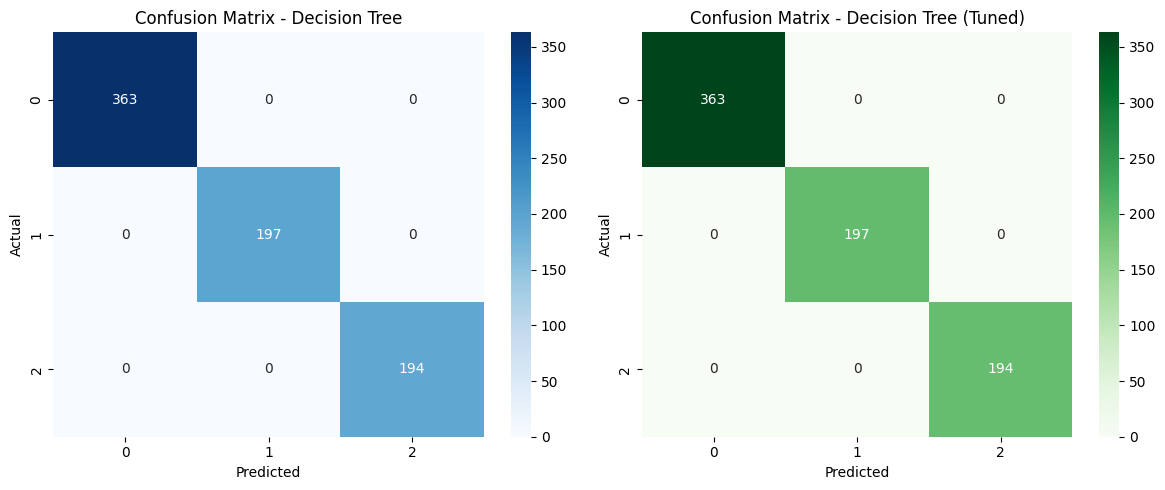

In [68]:
# Hitung confusion matrix untuk masing-masing model
cm_dt_tune = confusion_matrix(y_test, dt_pred_tune)
cm_dt = confusion_matrix(y_test, dt_pred)

# Buat figure untuk 2 confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix untuk Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Decision Tree')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot confusion matrix untuk Decision Tree
sns.heatmap(cm_dt_tune, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Decision Tree (Tuned)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [67]:
# Classification Report Model
report_dt = classification_report(y_test, dt_pred, output_dict=True)
report_dt_tune = classification_report(y_test, dt_pred_tune, output_dict=True)

# Ubah jadi DataFrame
df_dt_tune = pd.DataFrame(report_dt).transpose()
df_dt = pd.DataFrame(report_rf).transpose()

# Gabungkan keduanya side-by-side
comparison_df = pd.concat([df_dt_tune.add_suffix(' DT Tuned'),
                           df_rf.add_suffix(' DT')], axis=1)

# Tampilkan hanya label kelas dan average
display(comparison_df.round(3))

,precision DT Tuned,recall DT Tuned,f1-score DT Tuned,support DT Tuned,precision DT,recall DT,f1-score DT,support DT
0,1.0,1.0,1.0,363.0,1.0,1.0,1.0,363.0
1,1.0,1.0,1.0,197.0,1.0,1.0,1.0,197.0
2,1.0,1.0,1.0,194.0,1.0,1.0,1.0,194.0
accuracy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,754.0,1.0,1.0,1.0,754.0
weighted avg,1.0,1.0,1.0,754.0,1.0,1.0,1.0,754.0


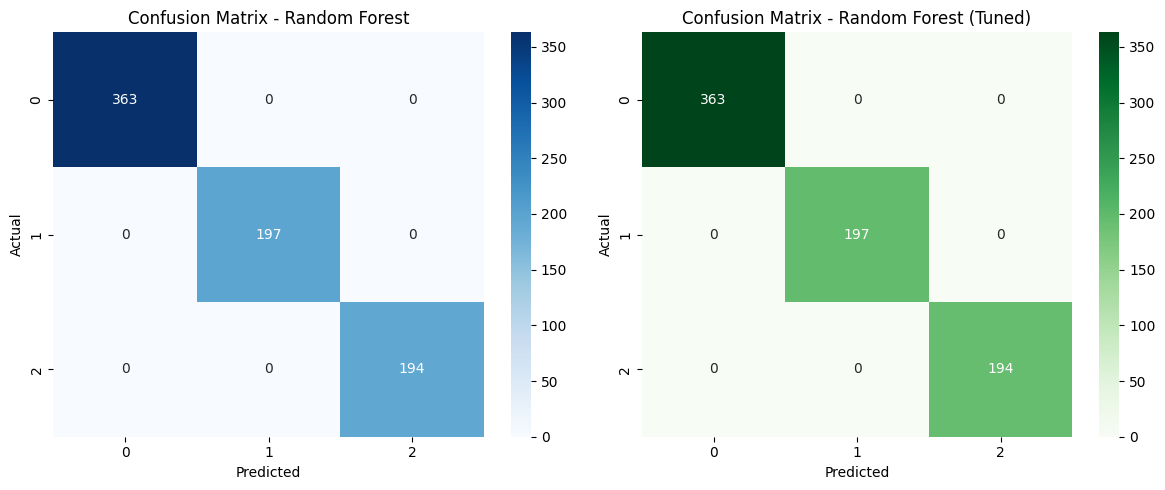

In [69]:
# Hitung confusion matrix untuk masing-masing model
cm_rf_tune = confusion_matrix(y_test, rf_pred_tune)
cm_rf = confusion_matrix(y_test, rf_pred)

# Buat figure untuk 2 confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix untuk Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot confusion matrix untuk Random Forest
sns.heatmap(cm_rf_tune, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest (Tuned)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [70]:
# Classification Report Model
report_rf = classification_report(y_test, rf_pred, output_dict=True)
report_rf_tune = classification_report(y_test, rf_pred_tune, output_dict=True)

# Ubah jadi DataFrame
df_rf_tune = pd.DataFrame(report_rf).transpose()
df_rf = pd.DataFrame(report_rf).transpose()

# Gabungkan keduanya side-by-side
comparison_df = pd.concat([df_rf_tune.add_suffix(' RF Tuned'),
                           df_rf.add_suffix(' RF')], axis=1)

# Tampilkan hanya label kelas dan average
display(comparison_df.round(3))

,precision RF Tuned,recall RF Tuned,f1-score RF Tuned,support RF Tuned,precision RF,recall RF,f1-score RF,support RF
0,1.0,1.0,1.0,363.0,1.0,1.0,1.0,363.0
1,1.0,1.0,1.0,197.0,1.0,1.0,1.0,197.0
2,1.0,1.0,1.0,194.0,1.0,1.0,1.0,194.0
accuracy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,754.0,1.0,1.0,1.0,754.0
weighted avg,1.0,1.0,1.0,754.0,1.0,1.0,1.0,754.0


Model yang dibuat sudah sangat baik dalam melakukan klasifikasi, ditunjukkan dari nilai akurasi pada data tran dan test yang mencapai 100% baik sebelum maupun setelah dilakukan hyperparaneter tunning. Rekomendasi tindak lanjutnya adalah menguji model pada data baru untuk memastikan generalisasi dari model.